In [9]:
import matplotlib.pyplot as plt
from PIL.EpsImagePlugin import field
from sklearn.linear_model import LinearRegression
import mglearn
import mglearn.datasets
import numpy as np

Text(0, 0.5, 'Целевая переменная')

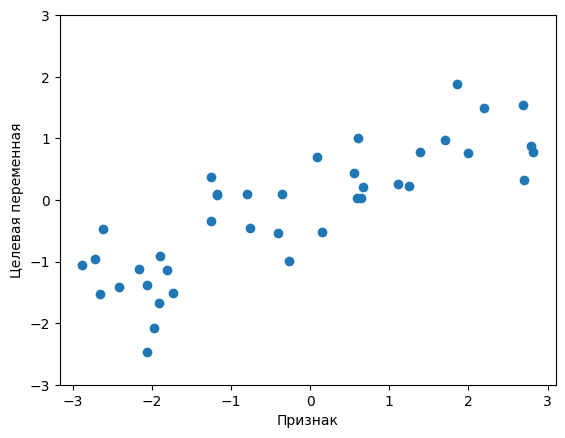

In [11]:
x, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(x, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Ключи cancer(): \n{}'.format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print("Array form of data from cancer: {}".format(cancer.data.shape))

Array form of data from cancer: (569, 30)


In [14]:
print("Quantity of examples for each class: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Quantity of examples for each class: 
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [15]:
print("Names of features: \n{}".format(cancer.feature_names))

Names of features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Array form of X: 
(26, 2)


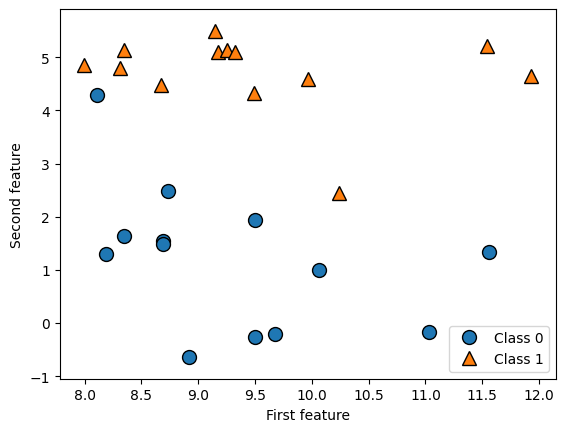

In [18]:
X, y = mglearn.datasets.make_forge()
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"])
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("Array form of X: \n{}".format(X.shape))

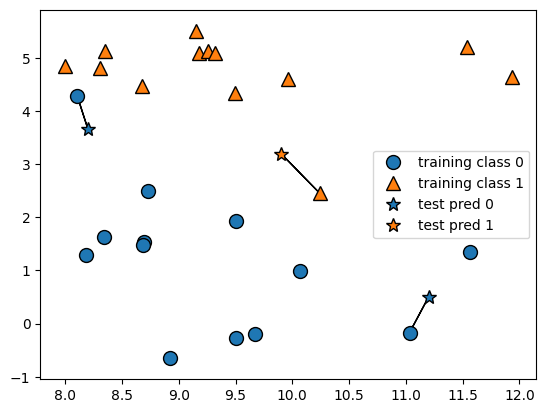

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

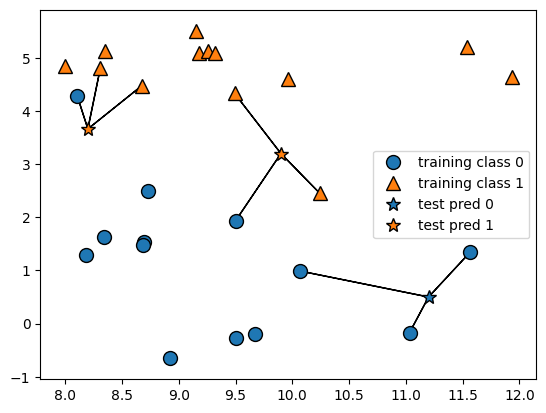

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [21]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print('Forecast on test set: {}'.format(clf.predict(X_test)))

Forecast on test set: [1 0 1 0 1 0 0]


In [26]:
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test set: 0.86


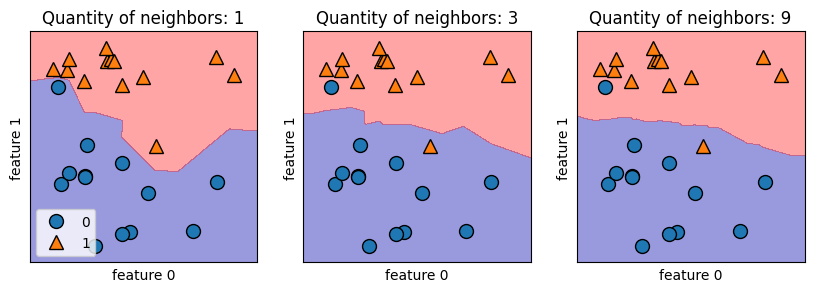

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Quantity of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

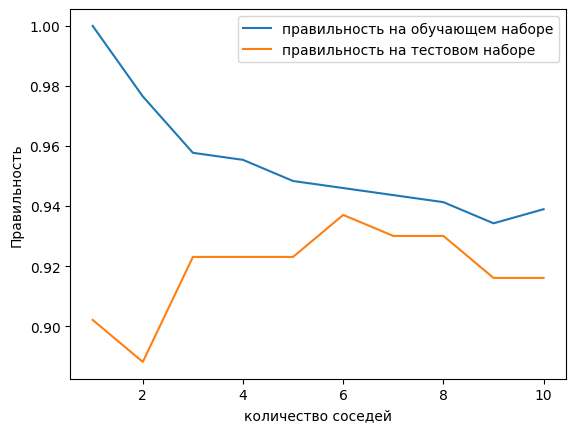

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 training_accuracy.append(clf.score(X_train, y_train))
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

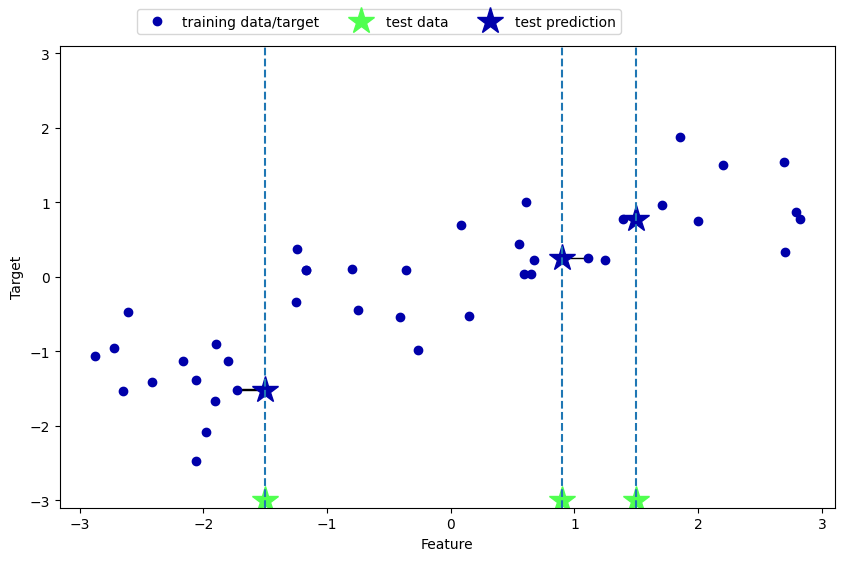

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

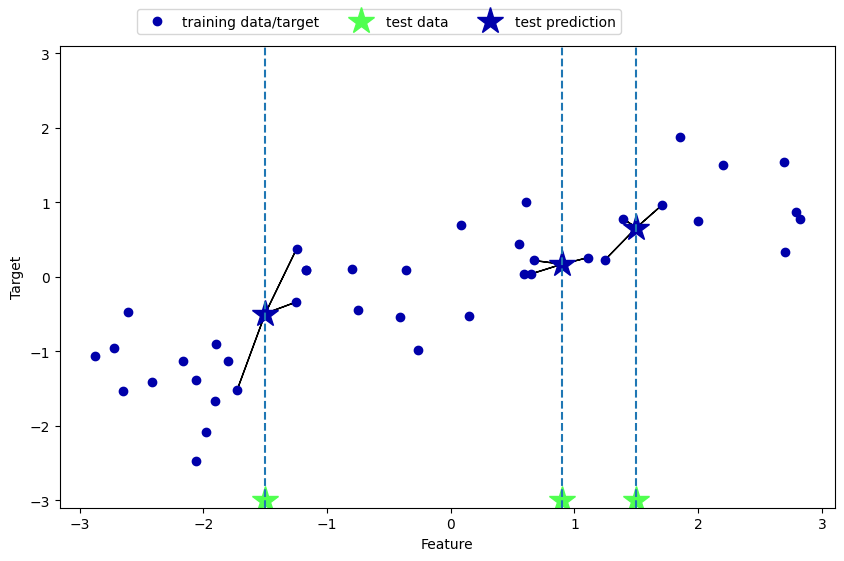

In [31]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [34]:
print("Forecast for test set: \n{}".format(reg.predict(X_test)))

Forecast for test set: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [35]:
print("R^2 on test set: {:.2f}".format(reg.score(X_test, y_test)))

R^2 on test set: 0.83


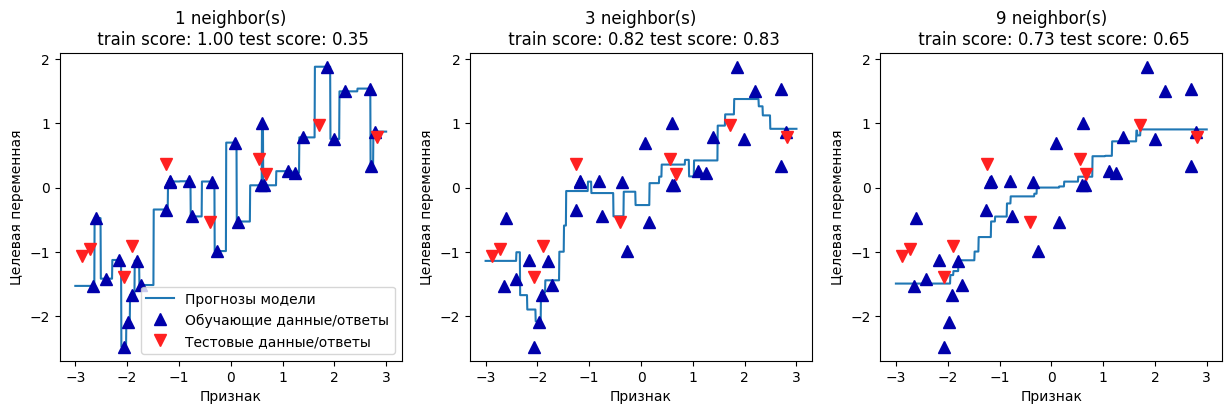

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


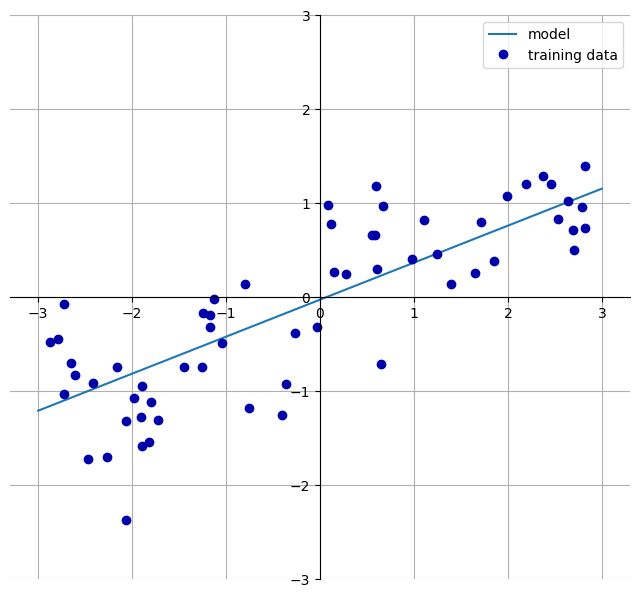

In [37]:
mglearn.plots.plot_linear_regression_wave()

In [38]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercep_t: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercep_t: -0.031804343026759746


In [40]:
print('Accuracy on train set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy on train set: 0.67
Accuracy on test set: 0.66


In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [42]:
print("Accuracy on train set: {:.2f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(lr.score(X_test, y_test)))

Accuracy on train set: 0.95
Accuracy on test set: 0.61


In [43]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Accuracy on train set: {:.2f}".format(ridge.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ridge.score(X_test, y_test)))

Accuracy on train set: 0.89
Accuracy on test set: 0.75


In [44]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Accuracy on train set: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ridge10.score(X_test, y_test)))

Accuracy on train set: 0.79
Accuracy on test set: 0.64


In [45]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Accuracy on train set: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ridge01.score(X_test, y_test)))

Accuracy on train set: 0.93
Accuracy on test set: 0.77


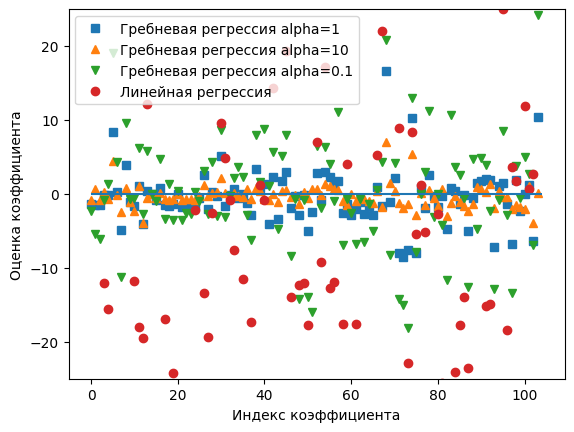

In [46]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

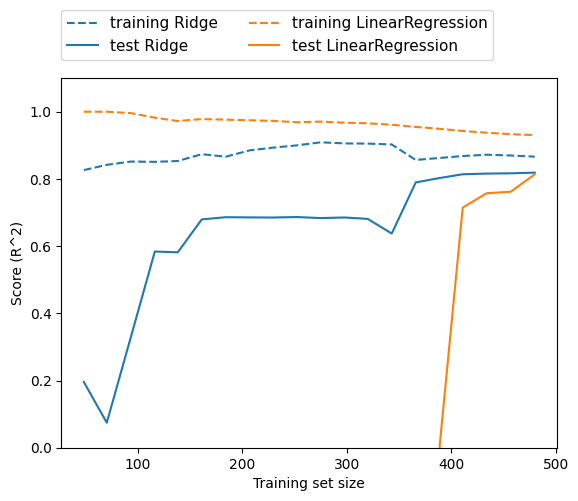

In [48]:
mglearn.plots.plot_ridge_n_samples()

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Quantity of used features: {}'.format(np.sum(lasso.coef_ != 0)))

Accuracy on train set: 0.29
Accuracy on test set: 0.21
Quantity of used features: 4


In [54]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Quantity of used features: {}'.format(np.sum(lasso001.coef_ != 0)))

Accuracy on train set: 0.90
Accuracy on test set: 0.77
Quantity of used features: 33


In [55]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Quantity of used features: {}'.format(np.sum(lasso00001.coef_ != 0)))

Accuracy on train set: 0.95
Accuracy on test set: 0.64
Quantity of used features: 96


Text(0, 0.5, 'Coefficient evaluetion')

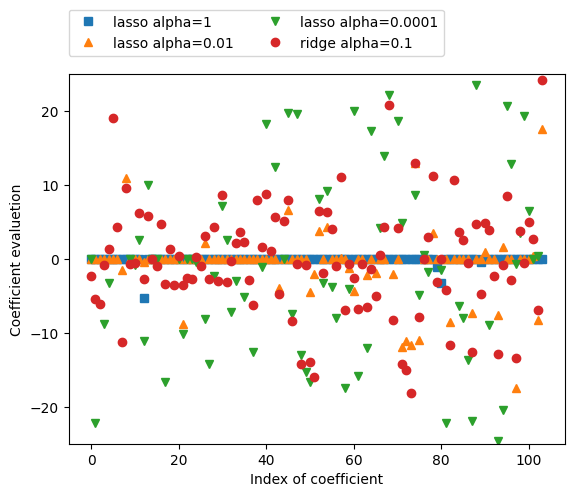

In [56]:
plt.plot(lasso.coef_, 's', label='lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Index of coefficient')
plt.ylabel('Coefficient evaluetion')

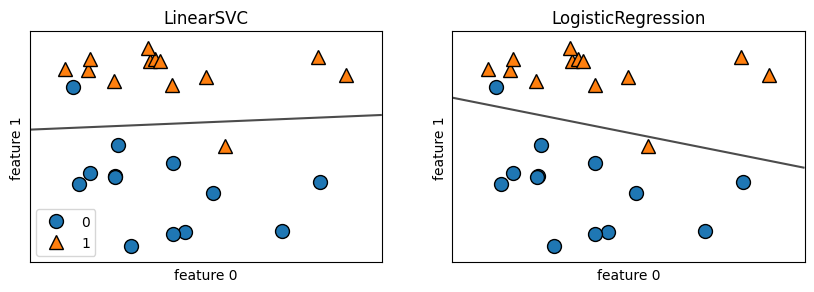

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend()

In [67]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Accuracy on train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on train set: 0.955
Accuracy on test set: 0.958


C:\Users\aidar\PycharmProjects\lab5_Kurmankozhoev_Aidarbek_AIN-1-22\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Accuracy on train set: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg100.score(X_test, y_test)))

Accuracy on train set: 0.955
Accuracy on test set: 0.944


C:\Users\aidar\PycharmProjects\lab5_Kurmankozhoev_Aidarbek_AIN-1-22\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Accuracy on train set: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg001.score(X_test, y_test)))

Accuracy on train set: 0.934
Accuracy on test set: 0.930


C:\Users\aidar\PycharmProjects\lab5_Kurmankozhoev_Aidarbek_AIN-1-22\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


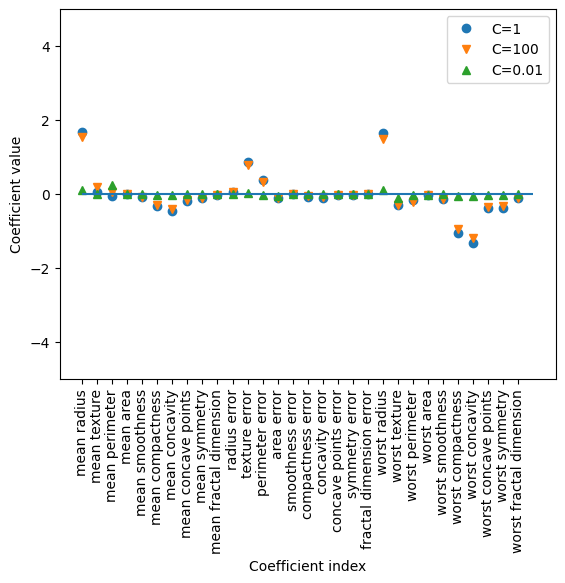

In [72]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, 'v', label='C=100')
plt.plot(logreg001.coef_.T, '^', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel('Coefficient value')
plt.legend()